## **Exploratory Analysis Of Geolocational Data**

***Aim*** : *This project involves the use of K-Means Clustering to find the best accommodation for
students near Thapar by classifying accommodation for
incoming students on the basis of their preferences on amenities, budget and proximity to
the location.* 

***Aryan Bhushan(102017056)      
Lagan Kapoor(102197007)***

In [ ]:
import numpy as np 
from tabulate import tabulate
import pandas as pd 
from sklearn.cluster import KMeans
import random
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv("/content/food_coded.csv")


In [ ]:
df.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


# **Data Cleaning**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          124 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null    float64
 13  diet_

In [ ]:
df.columns

Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1',
       'cuisine', 'diet_current', 'diet_current_coded', 'drink',
       'eating_changes', 'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       

In [ ]:
col=['cook','eating_out','employment','ethnic_food', 'exercise','fruit_day','income','on_off_campus','pay_meal_out','sports','veggies_day']

In [ ]:
df1=df[col]
df1

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5
1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4
2,1.0,2,3.0,5,2.0,5,6.0,2.0,3,2.0,5
3,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3
4,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...
120,3.0,2,1.0,4,2.0,5,4.0,3.0,4,1.0,5
121,3.0,4,3.0,3,2.0,4,2.0,1.0,4,NaN,5
122,3.0,3,3.0,5,2.0,4,2.0,1.0,4,2.0,4
123,3.0,5,2.0,2,1.0,5,4.0,1.0,3,2.0,3


# **Box Plot**




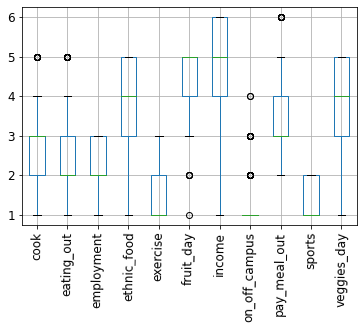

In [ ]:
boxplot = df1.boxplot(rot=89, fontsize=12)  

In [ ]:
s=df1.dropna()

# **K-mean clustering**

In [ ]:
## for geospatial
import folium
import geopy
## for machine learning
from sklearn import preprocessing, cluster
#import scipy



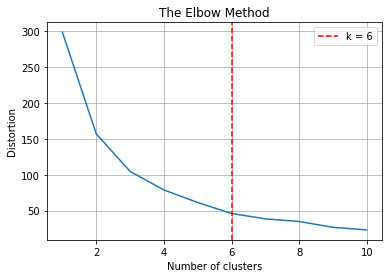

In [ ]:
f=['cook','income']
X = s[f]
max_k = 10
## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i 
     in np.diff(distortions,2)]))
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

# **Geolocational Data**

In [ ]:
import json  
from pandas.io.json import json_normalize  
import requests
from sklearn.cluster import KMeans
import random

In [ ]:
url = 'https://discover.search.hereapi.com/v1/discover?in=circle:30.3529087,76.3613691;r=10000&q=apartment&apiKey=H-6KWCtm4CpPtY-vLesMrZHffIiuFmRv5VdV5zfCUUk'
data = requests.get(url).json()
d=json_normalize(data['items'])
d.to_csv('apartment.csv')
d


,title,id,language,ontologyId,resultType,access,distance,categories,address.label,address.countryCode,...,address.stateCode,address.state,address.county,address.city,address.district,address.subdistrict,address.street,address.postalCode,position.lat,position.lng
0,5 D Model Town Patiala,here:pds:place:356ttqk9-39dcfd29580c824a2d3b3a...,en,here:cm:ontology:apartment_rental_flat_rental,place,"[{'lat': 30.34675, 'lng': 76.36352}]",719,"[{'id': '700-7200-0324', 'name': 'Apartment/Fl...","5 D Model Town Patiala, Model Town Road, Block...",IND,...,PB,Punjab,Patiala,Patiala,Model Town,Block E,Model Town Road,147001,30.34678,76.36375
1,Jaspal Singh#5 Bharat,here:pds:place:356ttqk9-dfc7948846cda0579f9f1a...,en-GB,here:cm:ontology:apartment_rental_flat_rental,place,"[{'lat': 30.34794, 'lng': 76.35136}]",1116,"[{'id': '700-7200-0324', 'name': 'Apartment/Fl...","Jaspal Singh#5 Bharat, Lane No 2, Blossom Encl...",IND,...,PB,Punjab,Patiala,Patiala,Century Enclave,Blossom Enclave,Lane No 2,147005,30.34796,76.35125
2,Majhitia Apartment,here:pds:place:356ttqk9-eb5efe68c8f4b3f2a9018f...,en,here:cm:ontology:apartment_rental_flat_rental,place,"[{'lat': 30.34297, 'lng': 76.35954}]",1119,"[{'id': '700-7200-0324', 'name': 'Apartment/Fl...","Majhitia Apartment, Phase 2, Majithia Enclave,...",IND,...,PB,Punjab,Patiala,Patiala,Majithia Enclave,Phase 2,NaN,147005,30.34298,76.35948
3,Dhillon House,here:pds:place:356ttqk9-12252dbbb65ec1e86a6165...,en-GB,here:cm:ontology:apartment_rental_flat_rental,place,"[{'lat': 30.36112, 'lng': 76.36852}]",1139,"[{'id': '700-7200-0324', 'name': 'Apartment/Fl...","Dhillon House, Street No 8, Prem Nagar, Patial...",IND,...,PB,Punjab,Patiala,Patiala,Prem Nagar,NaN,Street No 8,147004,30.36113,76.36845
4,Prince Cottage,here:pds:place:356ttqk9-6a902084d72ccf21ad3ca8...,en,here:cm:ontology:apartment_rental_flat_rental,place,"[{'lat': 30.35925, 'lng': 76.3747}]",1460,"[{'id': '700-7200-0324', 'name': 'Apartment/Fl...","Prince Cottage, Dashmesh Nagar, Patiala 147004...",IND,...,PB,Punjab,Patiala,Patiala,Dashmesh Nagar,NaN,NaN,147004,30.35925,76.37470
5,Ajmer Singh Sandhu,here:pds:place:356ttqkc-46fced442f8d09b74255fc...,en,here:cm:ontology:apartment_rental_flat_rental,place,"[{'lat': 30.36919, 'lng': 76.3636}]",1829,"[{'id': '700-7200-0324', 'name': 'Apartment/Fl...","Ajmer Singh Sandhu, Gali No 6, Aman Vihar, Sar...",IND,...,PB,Punjab,Patiala,Patiala,Sarabha Nagar,Aman Vihar,Gali No 6,147004,30.36925,76.36355
6,Rim Rose Apartment,here:pds:place:356ttqk9-6c4231a42ff770cb70d95d...,en,here:cm:ontology:apartment_rental_flat_rental,place,"[{'lat': 30.36596, 'lng': 76.37535}]",1970,"[{'id': '700-7200-0324', 'name': 'Apartment/Fl...","Rim Rose Apartment, Gali No 11A, Grewal Avenue...",IND,...,PB,Punjab,Patiala,Patiala,Manjit Nagar,Grewal Avenue,Gali No 11A,147004,30.36596,76.37525
7,Madle Town Patiala,here:pds:place:356ttqkd-cbd2413750e2bdf17c3d3a...,en,here:cm:ontology:apartment_rental_flat_rental,place,"[{'lat': 30.34659, 'lng': 76.38201}]",2103,"[{'id': '700-7200-0324', 'name': 'Apartment/Fl...","Madle Town Patiala, Punjabi Bagh, Patiala 1470...",IND,...,PB,Punjab,Patiala,Patiala,Punjabi Bagh,NaN,NaN,147001,30.34660,76.38203
8,Udit Bhawan,here:pds:place:356ttqkd-306257aa32fb3380da5881...,en,here:cm:ontology:apartment_rental_flat_rental,place,"[{'lat': 30.36299, 'lng': 76.38342}]",2393,"[{'id': '700-7200-0324', 'name': 'Apartment/Fl...","Udit Bhawan, Block A, Anand Nagar, Patiala 147...",IND,...,PB,Punjab,Patiala,Patiala,Anand Nagar,Block A,NaN,147004,30.36296,76.38342
9,Home,here:pds:place:356ttqkd-3cfac0fda6925068b8d340...,en,here:cm:ontology:apartment_rental_flat_rental,place,"[{'lat': 30.36221, 'lng': 76.38415}]",2414,"[{'id': '700-7200-0324', 'name': 'Apartment/Fl...","Home, Street No 6, Block A, Anand Nagar, Patia...",IND,...,PB,Punjab,Patiala,Patiala,Anand Nagar,Block A,Street No 6,147004,30.36221,76.38410


# **Geolocation Data Cleaning**

In [ ]:
colu=['title','address.label','distance','access','position.lat','position.lng','address.postalCode','id']

In [ ]:
da2= d[colu]
da2.to_csv('cleaned_apartment.csv')
da2

,title,address.label,distance,access,position.lat,position.lng,address.postalCode,id
0,5 D Model Town Patiala,"5 D Model Town Patiala, Model Town Road, Block...",719,"[{'lat': 30.34675, 'lng': 76.36352}]",30.34678,76.36375,147001,here:pds:place:356ttqk9-39dcfd29580c824a2d3b3a...
1,Jaspal Singh#5 Bharat,"Jaspal Singh#5 Bharat, Lane No 2, Blossom Encl...",1116,"[{'lat': 30.34794, 'lng': 76.35136}]",30.34796,76.35125,147005,here:pds:place:356ttqk9-dfc7948846cda0579f9f1a...
2,Majhitia Apartment,"Majhitia Apartment, Phase 2, Majithia Enclave,...",1119,"[{'lat': 30.34297, 'lng': 76.35954}]",30.34298,76.35948,147005,here:pds:place:356ttqk9-eb5efe68c8f4b3f2a9018f...
3,Dhillon House,"Dhillon House, Street No 8, Prem Nagar, Patial...",1139,"[{'lat': 30.36112, 'lng': 76.36852}]",30.36113,76.36845,147004,here:pds:place:356ttqk9-12252dbbb65ec1e86a6165...
4,Prince Cottage,"Prince Cottage, Dashmesh Nagar, Patiala 147004...",1460,"[{'lat': 30.35925, 'lng': 76.3747}]",30.35925,76.37470,147004,here:pds:place:356ttqk9-6a902084d72ccf21ad3ca8...
5,Ajmer Singh Sandhu,"Ajmer Singh Sandhu, Gali No 6, Aman Vihar, Sar...",1829,"[{'lat': 30.36919, 'lng': 76.3636}]",30.36925,76.36355,147004,here:pds:place:356ttqkc-46fced442f8d09b74255fc...
6,Rim Rose Apartment,"Rim Rose Apartment, Gali No 11A, Grewal Avenue...",1970,"[{'lat': 30.36596, 'lng': 76.37535}]",30.36596,76.37525,147004,here:pds:place:356ttqk9-6c4231a42ff770cb70d95d...
7,Madle Town Patiala,"Madle Town Patiala, Punjabi Bagh, Patiala 1470...",2103,"[{'lat': 30.34659, 'lng': 76.38201}]",30.34660,76.38203,147001,here:pds:place:356ttqkd-cbd2413750e2bdf17c3d3a...
8,Udit Bhawan,"Udit Bhawan, Block A, Anand Nagar, Patiala 147...",2393,"[{'lat': 30.36299, 'lng': 76.38342}]",30.36296,76.38342,147004,here:pds:place:356ttqkd-306257aa32fb3380da5881...
9,Home,"Home, Street No 6, Block A, Anand Nagar, Patia...",2414,"[{'lat': 30.36221, 'lng': 76.38415}]",30.36221,76.38410,147004,here:pds:place:356ttqkd-3cfac0fda6925068b8d340...


In [ ]:
df_final=da2[['position.lat','position.lng']]

CafeList=[]
ResList=[]
GymList=[]
parknear=[]
storenear=[]
latitudes = list(da2['position.lat'])
longitudes = list( da2['position.lng'])
for lat, lng in zip(latitudes, longitudes):    
    radius = '1000' #Set the radius to 1000 metres
    latitude=lat
    longitude=lng
    
    search_query = 'gym' #Search for any gyms
    url = 'https://discover.search.hereapi.com/v1/discover?in=circle:{},{};r={}&q={}&apiKey=H-6KWCtm4CpPtY-vLesMrZHffIiuFmRv5VdV5zfCUUk'.format(latitude, longitude, radius, search_query)
    results = requests.get(url).json()
    venues=json_normalize(results['items'])
    GymList.append(venues['title'].count())
    
    search_query = 'park' #Search for any park
    url = 'https://discover.search.hereapi.com/v1/discover?in=circle:{},{};r={}&q={}&apiKey=H-6KWCtm4CpPtY-vLesMrZHffIiuFmRv5VdV5zfCUUk'.format(latitude, longitude, radius, search_query)
    results = requests.get(url).json()
    venues=json_normalize(results['items'])
    parknear.append(venues['title'].count())

    search_query = 'market' #Search for any stores
    url = 'https://discover.search.hereapi.com/v1/discover?in=circle:{},{};r={}&q={}&apiKey=H-6KWCtm4CpPtY-vLesMrZHffIiuFmRv5VdV5zfCUUk'.format(latitude, longitude, radius, search_query)
    results = requests.get(url).json()
    venues=json_normalize(results['items'])
    storenear.append(venues['title'].count())

df_final['Gyms'] = GymList
df_final['Park']= parknear
df_final['stores']=storenear
df_final

,position.lat,position.lng,Gyms,Park,stores
0,30.34678,76.36375,3,8,19
1,30.34796,76.35125,2,2,7
2,30.34298,76.35948,3,5,16
3,30.36113,76.36845,7,2,20
4,30.35925,76.37470,9,5,20
5,30.36925,76.36355,8,2,20
6,30.36596,76.37525,11,1,20
7,30.34660,76.38203,14,19,18
8,30.36296,76.38342,9,2,20
9,30.36221,76.38410,9,4,20


# **K-mean Clustering on Geolocation**

In [ ]:
kclusters = 3

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_final)
df_final['Cluster']=kmeans.labels_
df_final['Cluster']=df_final['Cluster'].apply(str)
df_final

,position.lat,position.lng,Gyms,Park,stores,Cluster
0,30.34678,76.36375,3,8,19,0
1,30.34796,76.35125,2,2,7,2
2,30.34298,76.35948,3,5,16,2
3,30.36113,76.36845,7,2,20,0
4,30.35925,76.37470,9,5,20,0
5,30.36925,76.36355,8,2,20,0
6,30.36596,76.37525,11,1,20,0
7,30.34660,76.38203,14,19,18,1
8,30.36296,76.38342,9,2,20,0
9,30.36221,76.38410,9,4,20,0


# **Plotting clustered locations on map using Folium**

In [ ]:
#define coordinates of the college
map_bom=folium.Map(location=[30.3529087,76.3613691],zoom_start=12)

# instantiate a feature group for the incidents in the dataframe
locations = folium.map.FeatureGroup()

# set color scheme for the clusters
def color_producer(cluster):
    if cluster=='0':
        return 'green'
    elif cluster=='1':
        return 'yellow'
    else:
        return 'red'
    

latitudes = list(df_final['position.lat'])
longitudes = list(df_final['position.lng'])
labels = list(df_final['Cluster'])
names=list(da2['title'])
for lat, lng, label,names in zip(latitudes, longitudes, labels,names):
    folium.CircleMarker(
            [lat,lng],
            fill=True,
            fill_opacity=1,
            popup=folium.Popup(names, max_width = 300),
            radius=5,
            color=color_producer(label)
        ).add_to(map_bom)

# add locations to map
map_bom.add_child(locations)
map=folium.Marker([30.3529087,76.3613691],popup='TIET').add_to(map_bom)


In [ ]:
map_bom
#Cluster 0 (Green) has more stores but less Park and avg Gyms.		
#Cluster 1 (Yellow) has maximum park,stores and Gyms.	
#Cluster 2 (Red) has less stores Park and Gyms.

In [ ]:
map_bom.save("map-patiala.html")